In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [300]:
df = pd.read_csv('estates.csv')
df.head()

,postal_code,rooms,area,garden_area,price
0,6263.0,2,40,0,244000
1,3295.0,0,920,0,2000000
2,6380.0,4,100,0,850000
3,9020.0,5,122,0,258000
4,2603.0,0,700,0,289000


In [301]:
df['postal_code'] = df['postal_code'] // 1000

In [302]:
df['total_area'] = df['area'] + df['garden_area']

In [303]:
df.isna().sum().sort_values(ascending=False)

postal_code    1
rooms          0
area           0
garden_area    0
price          0
total_area     0
dtype: int64

In [304]:
df.dropna(inplace=True)

In [305]:
df.dtypes

postal_code    float64
rooms            int64
area             int64
garden_area      int64
price            int64
total_area       int64
dtype: object

In [306]:
df = df.astype(int)

In [307]:
df.head()

,postal_code,rooms,area,garden_area,price,total_area
0,6,2,40,0,244000,40
1,3,0,920,0,2000000,920
2,6,4,100,0,850000,100
3,9,5,122,0,258000,122
4,2,0,700,0,289000,700


In [308]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
postal_code,2449.0,3.350755e+00,2.736501e+00,0.0,1.0,2.0,5.0,9.0
rooms,2449.0,4.956309e+00,1.281193e+01,0.0,2.0,3.0,4.0,235.0
area,2449.0,2.654835e+02,3.827895e+03,0.0,53.0,78.0,120.0,183000.0
garden_area,2449.0,1.537975e+01,1.194322e+02,0.0,0.0,0.0,0.0,3000.0
price,2449.0,2.501598e+06,7.630117e+06,0.0,251800.0,399900.0,699900.0,99900011.0
total_area,2449.0,2.808632e+02,3.829859e+03,0.0,53.0,78.0,124.0,183000.0


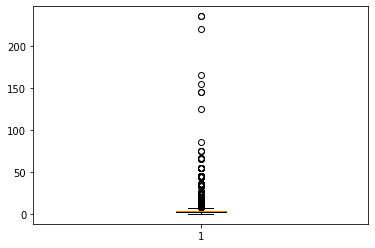

In [309]:
plt.boxplot(df['rooms'])
plt.show()

In [310]:
df.loc[(df['rooms'] > 10)]['postal_code'].count()

149

In [311]:
df.drop(df[df.rooms > 10].index, inplace=True)

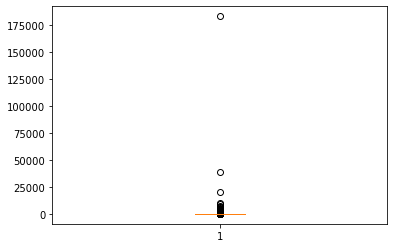

In [312]:
plt.boxplot(df['area'])
plt.show()

In [313]:
df.loc[(df['area'] > 500)]['postal_code'].count()

105

In [314]:
df.drop(df[df.area > 500].index, inplace=True)
df.drop(df[df.area < 10].index, inplace=True)

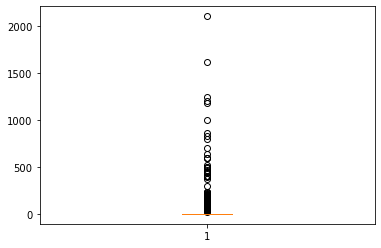

In [315]:
plt.boxplot(df['garden_area'])
plt.show()

In [316]:
df.loc[(df['garden_area'] > 100)]['postal_code'].count()

64

In [317]:
df.drop(df[df.garden_area > 100].index, inplace=True)

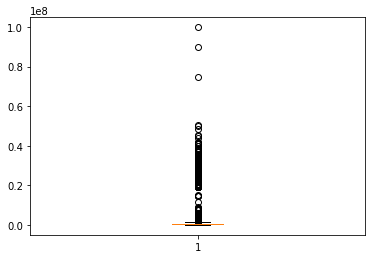

In [318]:
plt.boxplot(df['price'])
plt.show()

In [319]:
df.loc[(df['price'] > 10_000_000)]['postal_code'].count()

154

In [320]:
df.drop(df[df.price > 10_000_000].index, inplace=True)
df.drop(df[df.price < 1000].index, inplace=True)

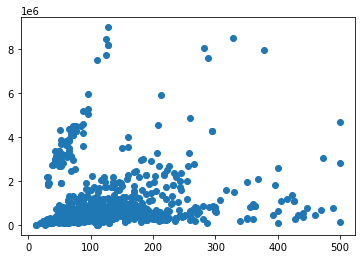

In [321]:
plt.scatter(df['total_area'], df['price'])
plt.show()

In [322]:
X = df.drop('price', axis=1)
y = df['price']

In [323]:
sc = StandardScaler()
scaled = sc.fit_transform(X)

X_cols = X.columns

X = pd.DataFrame(scaled, columns=X_cols)

X.head()

,postal_code,rooms,area,garden_area,total_area
0,1.038903,-0.592279,-0.830777,-0.127609,-0.831685
1,1.038903,0.688419,0.072286,-0.127609,0.054369
2,2.143796,1.328767,0.403409,-0.127609,0.379255
3,-0.802586,0.688419,-0.123377,-0.127609,-0.137609
4,1.038903,-0.592279,-0.785624,-0.127609,-0.787382


In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [325]:
lr = LinearRegression()

regressor = lr.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 461156.21416940476
Mean Squared Error: 788681220171.3308
Root Mean Squared Error: 888077.2602489779
